In [1]:
RASPBERRY_PI = False
if RASPBERRY_PI:
    !pip install .
else:        
    !pip install git+https://github.com/madhuhegde/super_resolution.git

  Cloning https://github.com/madhuhegde/super_resolution.git to /private/var/folders/2h/l5d7t83505v2q98ksvtcld1m0000gn/T/pip-req-build-5_ymcr0t
  Running command git clone --filter=blob:none --quiet https://github.com/madhuhegde/super_resolution.git /private/var/folders/2h/l5d7t83505v2q98ksvtcld1m0000gn/T/pip-req-build-5_ymcr0t
  Resolved https://github.com/madhuhegde/super_resolution.git to commit 5931129866fb979148a6b84e440a9a91743fd06f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
from latent_diffusion import LDMSuperResolutionPipeline
from latent_diffusion import LDMConsistencySRPipeline
import torch

# load model 
pipeline = LDMSuperResolutionPipeline() 

device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline.unet.to(device)
pipeline.vaedecoder.to(device)

#set device
if RASPBERRY_PI:
   device = "cpu" #"cuda" if torch.cuda.is_available() else "cpu"
   PATH_UNET = "/home/raspberry/work/diffusion/Unet_model_dict.pt"  
   PATH_VAE_DECODER = "/home/raspberry/work/diffusion/vae_decoder_model.pt" 
   pipeline.unet.load_state_dict(torch.load(PATH_UNET)) #, map_location=torch.device('cpu'))) 
   pipeline.vaedecoder.load_state_dict(torch.load(PATH_VAE_DECODER)) 
else:
   PATH_VQVAE = "/Users/madhuhegde/work/diffusion/LDM/hf_vqvae_model.pt" #"VQ_model_dict.pt"
   PATH_UNET = "/Users/madhuhegde/work/diffusion/LDM/hf_unet_model.pt" 
   PATH_VAE_DECODER = "/Users/madhuhegde/work/diffusion/LDM/vae_decoder_model.pt" 
   device = "cuda" if torch.cuda.is_available() else "cpu" 
   #pipeline.vqvae.load_state_dict(torch.load(PATH_VQVAE)) 
   pipeline.unet.load_state_dict(torch.load(PATH_UNET, map_location=torch.device('cpu')))
   pipeline.vaedecoder.load_state_dict(torch.load(PATH_VAE_DECODER))  


sample_size=64, in_channels=6,out_channels=3, center_input_sample=False,time_embedding_type=positional,freq_shift=0,flip_sin_to_cos=True
down_block_types=['DownBlock2D', 'DownBlock2D', 'DownBlock2D', 'AttnDownBlock2D'],up_block_types=['AttnUpBlock2D', 'UpBlock2D', 'UpBlock2D', 'UpBlock2D'], block_out_channels=[160, 320, 320, 640],layers_per_block=2,mid_block_scale_factor=1,downsample_padding=1,downsample_type=conv,upsample_type=conv,dropout=0.0,act_fn=silu
attention_head_dim=32,norm_num_groups=32,attn_norm_num_groups=None,norm_eps=1e-05,resnet_time_scale_shift=default,add_attention=True,class_embed_type=None,num_class_embeds=None,num_train_timesteps=None
in_channels=3,out_channels=3,up_block_types=['UpDecoderBlock2D', 'UpDecoderBlock2D', 'UpDecoderBlock2D'], block_out_channels=[128, 256, 512], layers_per_block=2, act_fn=silu,latent_channels=3
latent_channels=3, sample_size=256,num_vq_embeddings=8192, norm_num_groups=32, vq_embed_dim =3,scaling_factor=0.18215,norm_type=group


In [4]:

from PIL import Image
if RASPBERRY_PI:
  image  = Image.open("/home/raspberry/Downloads/kairu.jpg").convert("RGB")
  image = image.crop((0, 40, 463, 503))
  down_size_img = image.resize((96, 96))  
else: 
  image  = Image.open("/Users/madhuhegde/work/diffusion/LDM/kairu.png").convert("RGB")  
  down_size_img = image.resize((128, 128))


# run pipeline in inference (sample random noise and denoise)
super_res_image = pipeline(down_size_img, num_inference_steps=20, eta=1).images[0]
del pipeline

100%|███████████████████████████████████████████| 20/20 [00:49<00:00,  2.47s/it]


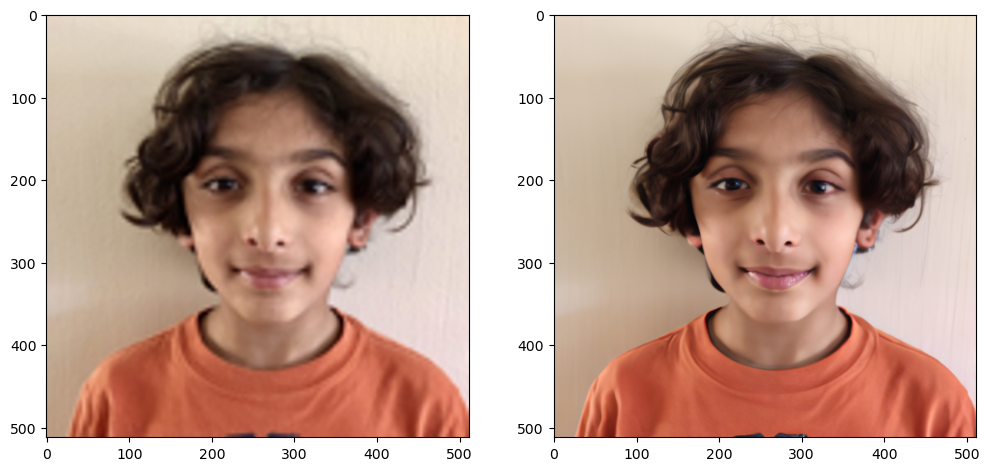

In [5]:
import matplotlib.pyplot as plt
if RASPBERRY_PI:
   low_res_img = down_size_img.resize((96*4, 96*4))
else:    
   low_res_img = down_size_img.resize((128*4, 128*4))
f, axarr = plt.subplots(1,2, figsize=(12, 12))
axarr[0].imshow(low_res_img )
axarr[1].imshow(super_res_image )

In [7]:
pipeline = LDMConsistencySRPipeline()
pipeline.vaedecoder.to(device)
pipeline.unet.to(device)

in_channels=3,out_channels=3,up_block_types=['UpDecoderBlock2D', 'UpDecoderBlock2D', 'UpDecoderBlock2D'], block_out_channels=[128, 256, 512], layers_per_block=2, act_fn=silu,latent_channels=3
latent_channels=3, sample_size=256,num_vq_embeddings=8192, norm_num_groups=32, vq_embed_dim =3,scaling_factor=0.18215,norm_type=group
sample_size=64, in_channels=6,out_channels=3, center_input_sample=False,time_embedding_type=positional,freq_shift=0,flip_sin_to_cos=True
down_block_types=['DownBlock2D', 'DownBlock2D', 'DownBlock2D', 'AttnDownBlock2D'],up_block_types=['AttnUpBlock2D', 'UpBlock2D', 'UpBlock2D', 'UpBlock2D'], block_out_channels=[160, 320, 320, 640],layers_per_block=2,mid_block_scale_factor=1,downsample_padding=1,downsample_type=conv,upsample_type=conv,dropout=0.0,act_fn=silu
attention_head_dim=32,norm_num_groups=32,attn_norm_num_groups=None,norm_eps=1e-05,resnet_time_scale_shift=default,add_attention=True,class_embed_type=None,num_class_embeds=None,num_train_timesteps=None


UNet2DModel(
  (conv_in): Conv2d(6, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=160, out_features=640, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=640, out_features=640, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 160, eps=1e-05, affine=True)
          (conv1): Conv2d(160, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=640, out_features=160, bias=True)
          (norm2): GroupNorm(32, 160, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(160, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Conv2d(16

In [9]:
#set device
if RASPBERRY_PI:
   device = "cpu" #"cuda" if torch.cuda.is_available() else "cpu"
   PATH_UNET = "/home/raspberry/work/diffusion/Unet_model_dict.pt"  
   PATH_VAE_DECODER = "/home/raspberry/work/diffusion/vae_decoder_model.pt" 
   pipeline.unet.load_state_dict(torch.load(PATH_UNET)) #, map_location=torch.device('cpu'))) 
   pipeline.vaedecoder.load_state_dict(torch.load(PATH_VAE_DECODER)) 
else:
   PATH_UNET = "/Users/madhuhegde/work/diffusion/LDM/con_unet_model.pt" 
   PATH_VAE_DECODER = "/Users/madhuhegde/work/diffusion/LDM/vae_decoder_model.pt" 
   device = "cuda" if torch.cuda.is_available() else "cpu" 
   #pipeline.vqvae.load_state_dict(torch.load(PATH_VQVAE)) 
   pipeline.unet.load_state_dict(torch.load(PATH_UNET, map_location=torch.device('cpu')))
   pipeline.vaedecoder.load_state_dict(torch.load(PATH_VAE_DECODER))  

In [10]:
# run pipeline in inference (sample random noise and denoise)
super_res_image = pipeline(down_size_img, num_inference_steps=2).images[0]
#del pipeline

100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


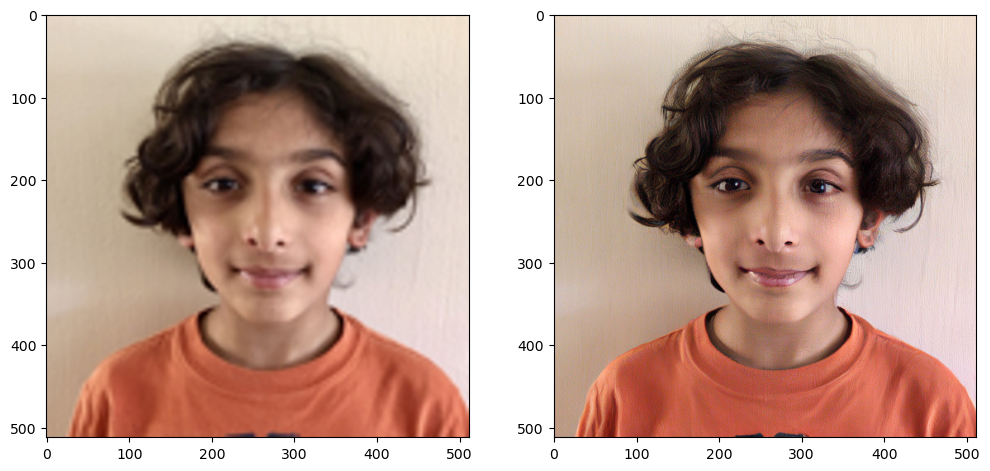

In [11]:
import matplotlib.pyplot as plt
if RASPBERRY_PI:
   low_res_img = down_size_img.resize((96*4, 96*4))
else:    
   low_res_img = down_size_img.resize((128*4, 128*4))
f, axarr = plt.subplots(1,2, figsize=(12, 12))
axarr[0].imshow(low_res_img )
axarr[1].imshow(super_res_image )